In [2]:
import math
%load_ext autoreload
%autoreload 2

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math
from pandas_datareader import data as pdr

In [356]:
etfs = ['XLF','XLK','XLE','XLV','XLI','XBI','XLU','XLP','XLY','KRE','XLB','XLC','XRT','XOP','XLRE','XHB','KBE','XME','KIE','XSD','XAR','XES','KCE','XNTK','XHE','XSW','XPH','XTN','XHS','XITK','XTL']
# etfs = [etf for etf in etfs if etf not in ['XLRE', 'XITK', 'XLC']]
# etfs = ['XBI', 'XLI']
prices = yf.download(tickers=etfs, period='max')['Close']
prices

[*********************100%***********************]  31 of 31 completed


Ticker,KBE,KCE,KIE,KRE,XAR,XBI,XES,XHB,XHE,XHS,...,XLY,XME,XNTK,XOP,XPH,XRT,XSD,XSW,XTL,XTN
Date,,,,,,,,,,,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.867020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.948046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.295290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.121681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.538368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-26,55.779999,143.360001,58.980000,59.480000,206.970001,83.680000,64.120003,97.599998,80.639999,98.290001,...,215.009995,67.300003,235.490005,127.779999,41.040001,76.629997,257.779999,187.039993,116.059998,80.019997
2025-06-27,55.740002,144.360001,59.169998,59.450001,209.809998,83.010002,63.680000,98.459999,80.879997,98.970001,...,218.589996,66.379997,234.929993,127.199997,40.630001,77.349998,256.089996,186.460007,116.320000,80.809998
2025-06-30,55.759998,144.929993,59.740002,59.389999,210.940002,82.930000,63.439999,98.570000,81.209999,99.550003,...,217.330002,67.220001,237.279999,125.800003,40.580002,77.059998,256.510010,189.820007,117.309998,80.500000


In [308]:
start_dates = {}
for col in prices.columns:
    start_dates[col] = prices[col].dropna().index[0]
start_dates = pd.Series(start_dates)
start_dates.sort_values()

XLI    1998-12-22
XLY    1998-12-22
XLV    1998-12-22
XLU    1998-12-22
XLP    1998-12-22
XLK    1998-12-22
XLF    1998-12-22
XLE    1998-12-22
XLB    1998-12-22
XNTK   2000-10-02
KBE    2005-11-15
KCE    2005-11-15
KIE    2005-11-15
XSD    2006-02-06
XHB    2006-02-06
XBI    2006-02-06
KRE    2006-06-22
XRT    2006-06-22
XPH    2006-06-22
XES    2006-06-22
XOP    2006-06-22
XME    2006-06-22
XTN    2011-01-27
XTL    2011-01-27
XHE    2011-01-27
XAR    2011-09-29
XSW    2011-09-29
XHS    2011-09-29
XLRE   2015-10-08
XITK   2016-01-14
XLC    2018-06-19
dtype: datetime64[ns]

In [246]:
dgs1mo = pdr.get_data_fred('DGS1MO', start='2001-07-31')
dgs1mo.index.rename('Date', inplace=True)

In [264]:
def get_tbills() -> pd.DataFrame:
    dgs1mo = pd.read_csv(f'../data/DGS1MO.csv').ffill().set_index('Date')
    dgs1mo.index = pd.to_datetime(dgs1mo.index)
    trading_days = 252
    tbill_daily_return = (1 + dgs1mo / 100) ** (1 / trading_days) - 1
    return tbill_daily_return['DGS1MO']

In [390]:
# Constants for the model
up_period = 20
down_period = 40
keltner_mult = 2
atr_approx_factor = 1.4
vol_window = 14
max_leverage = 2
target_vol = 0.015  # 1.5%
trade_cost_per_share = 0.0035
trade_cost_min = 0.35
rebalance_threshold = 0.1

# Sample structure of a strategy function
def trend_following_strategy(prices: pd.DataFrame):
    cash = pd.Series(index=prices.index, data=0.0)
    borrowed = pd.Series(index=prices.index, data=0.0).to_dict()
    tx_costs = pd.Series(index=prices.index, data=0.0).to_dict()

    tbills_daily_rate = get_tbills()

    returns = prices.pct_change()
    volatility = returns.rolling(vol_window).std()
    weights = pd.DataFrame(index=prices.index, columns=prices.columns, data=0.0).to_dict(orient='index')
    positions = pd.DataFrame(index=prices.index, columns=prices.columns, data=False).to_dict(orient='index')
    shares = pd.DataFrame(index=prices.index, columns=prices.columns, data=0.0).to_dict(orient='index')

    channels = dict()
    keltner_channels = dict()
    donchian_channels = dict()
    for j in prices.columns:
        for pos in ['up', 'price', 'down']:
            channels[(j, pos)] = dict()
            keltner_channels[(j, pos)] = dict()
            donchian_channels[(j, pos)] = dict()

    ema_up = prices.ewm(span=up_period, adjust=False).mean()
    ema_down = prices.ewm(span=down_period, adjust=False).mean()
    atr_approx_up = atr_approx_factor * returns.abs().rolling(up_period).mean()
    atr_approx_down = atr_approx_factor * returns.abs().rolling(down_period).mean()

    keltner_up = ema_up + keltner_mult * atr_approx_up
    keltner_down = ema_down + keltner_mult * atr_approx_down
    donchian_up = prices.rolling(up_period).max()
    donchian_down = prices.rolling(down_period).min()

    upper_band = np.minimum(donchian_up, keltner_up)
    lower_band = np.maximum(donchian_down, keltner_down)

    trailing_stop = [lower_band.iloc[0]]
    for t in range(1, len(lower_band.index)):
        trailing_stop_t = np.maximum(trailing_stop[t - 1], lower_band.iloc[t])
        trailing_stop.append(trailing_stop_t)
    trailing_stop = pd.DataFrame(index=lower_band.index, columns=lower_band.columns, data=trailing_stop)

    for j in prices.columns:
        channels[(j, 'down')] = lower_band[j]
        channels[(j, 'price')] = prices[j]
        channels[(j, 'up')] = upper_band[j]
        keltner_channels[(j, 'down')] = keltner_down[j]
        keltner_channels[(j, 'price')] = prices[j]
        keltner_channels[(j, 'up')] = keltner_up[j]
        donchian_channels[(j, 'down')] = donchian_down[j]
        donchian_channels[(j, 'price')] = prices[j]
        donchian_channels[(j, 'up')] = donchian_up[j]

    cash.iloc[:max(up_period, down_period, vol_window)] = 100_000

    # EOD: prices, channels, bands, trailing stops. These are computed for the end of the day, because they are derived from close prices.
    # SOD: positions, weights. These are computed for the start of the day. We use t - 1 EOD data to get t SOD positions and weights.
    # This means that at the end of day t - 1 we figure out what trades we need to execute the following morning. After the trades are executed
    # positions and weights for day t become reality. At the end of the t day, when evaluating the portfolio, we use the t positions and weights.

    for t in range(max(up_period, down_period, vol_window), len(prices)):
        date = prices.index[t]
        # print(f'* Day {t} - {date}')
        prev_date = prices.index[t - 1]

        # Compute desired positions at the start of the day
        for j in prices.columns:
            prev_position = positions[prev_date][j]
            prev_price = prices[j].iloc[t - 1]

            # Entry condition
            if not prev_position and prev_price >= upper_band[j].iloc[t - 1]:
                positions[date][j] = True
            # Exit condition
            elif prev_position:
                if prev_price < trailing_stop[j].iloc[t - 1]:
                    positions[date][j] = False
                else:
                    positions[date][j] = True
            else:
                positions[date][j] = False

        # Compute desired weights at the start of the day
        active = positions[date]
        n_active = sum(active.values())
        weights_today = {}
        for j in prices.columns:
            if active[j]:
                sigma = volatility[j].iloc[t]
                if pd.notna(sigma) and sigma > 0:
                    w = (target_vol / n_active) / sigma
                    weights_today[j] = w
                else:
                    weights_today[j] = 0
            else:
                weights_today[j] = 0
        exposure = sum(weights_today.values())
        if exposure > max_leverage:
            scaling_factor = max_leverage / exposure
            for j in weights_today:
                weights_today[j] *= scaling_factor
        weights[date] = weights_today

        # Evaluate portfolio and compute real weights before rebalancing
        holdings = prices.loc[prev_date] * pd.Series(shares[prev_date])
        borrowed[date] = borrowed[prev_date] + borrowed[prev_date] * tbills_daily_rate.loc[prev_date]
        cash[date] = cash[prev_date] + cash[prev_date] * tbills_daily_rate.loc[prev_date]
        equity = holdings.fillna(0).sum() + cash[date] - borrowed[date]
        before_rebalance_weights = holdings / equity

        trade_balance = 0
        for j in prices.columns:
            if weights_today[j] > before_rebalance_weights[j]:
                # We buy
                amount = (weights_today[j] - before_rebalance_weights[j]) * equity
                bought_shares = amount / prices.loc[prev_date, j]
                pct_change_shares = bought_shares / shares[prev_date][j] if shares[prev_date][j] > 0 else +math.inf
                if pct_change_shares >= rebalance_threshold:
                    shares[date][j] = shares[prev_date][j] + bought_shares
                    fees = max(trade_cost_min, trade_cost_per_share * bought_shares)
                    tx_costs[date] += fees
                    trade_balance += -fees - amount
                    # print(f'Buying {bought_shares} shares of {j} for ${amount} (${prices.loc[prev_date, j]}/share) - change {pct_change_shares*100} %')
                else:
                    shares[date][j] = shares[prev_date][j]
            elif weights_today[j] < before_rebalance_weights[j]:
                # We sell
                amount = (before_rebalance_weights[j] - weights_today[j]) * equity
                sold_shares = amount / prices.loc[prev_date, j]
                pct_change_shares = sold_shares / shares[prev_date][j] if shares[prev_date][j] > 0 else +math.inf
                if pct_change_shares >= rebalance_threshold:
                    shares[date][j] = shares[prev_date][j] - sold_shares
                    fees = max(trade_cost_min, trade_cost_per_share * sold_shares)
                    tx_costs[date] += fees
                    trade_balance += -fees + amount
                    # print(f'Selling {sold_shares} shares of {j} for ${amount} (${prices.loc[prev_date, j]}/share) - change {pct_change_shares*100} %')
                else:
                    shares[date][j] = shares[prev_date][j]
            else:
                shares[date][j] = shares[prev_date][j]
        if trade_balance >= 0:
            cash[date] += max(0, trade_balance - borrowed[date])
            borrowed[date] = max(0, borrowed[date] - trade_balance)
        else:
            borrowed[date] += max(0, -trade_balance - cash[date])
            cash[date] = max(0, cash[date] + trade_balance)
        # print(f'Cash: {cash[date]} | Borrowed: {borrowed[date]} | Holdings: {(prices.loc[date] * pd.Series(shares[date])).fillna(0).sum()} | Equity: {(prices.loc[date] * pd.Series(shares[date])).fillna(0).sum() + cash[date] - borrowed[date]}')

    weights = pd.DataFrame.from_dict(weights, orient='index')
    positions = pd.DataFrame.from_dict(positions, orient='index')
    shares = pd.DataFrame.from_dict(shares, orient='index')
    cash = pd.Series(cash)
    borrowed = pd.Series(borrowed)
    tx_costs = pd.Series(tx_costs)
    strategy_returns = (weights * returns).sum(axis=1)
    channels = pd.DataFrame.from_dict(channels)
    keltner_channels = pd.DataFrame.from_dict(keltner_channels)
    donchian_channels = pd.DataFrame.from_dict(donchian_channels)
    return strategy_returns, weights, positions, trailing_stop, cash, borrowed, shares, tx_costs, channels, keltner_channels, donchian_channels

In [391]:
strategy_returns, weights, positions, long_trailing_stop, cash, borrowed, shares, tx_costs, channels, keltner_channels, donchian_channels = trend_following_strategy(prices['2005-01-01':'2024-04-01'])

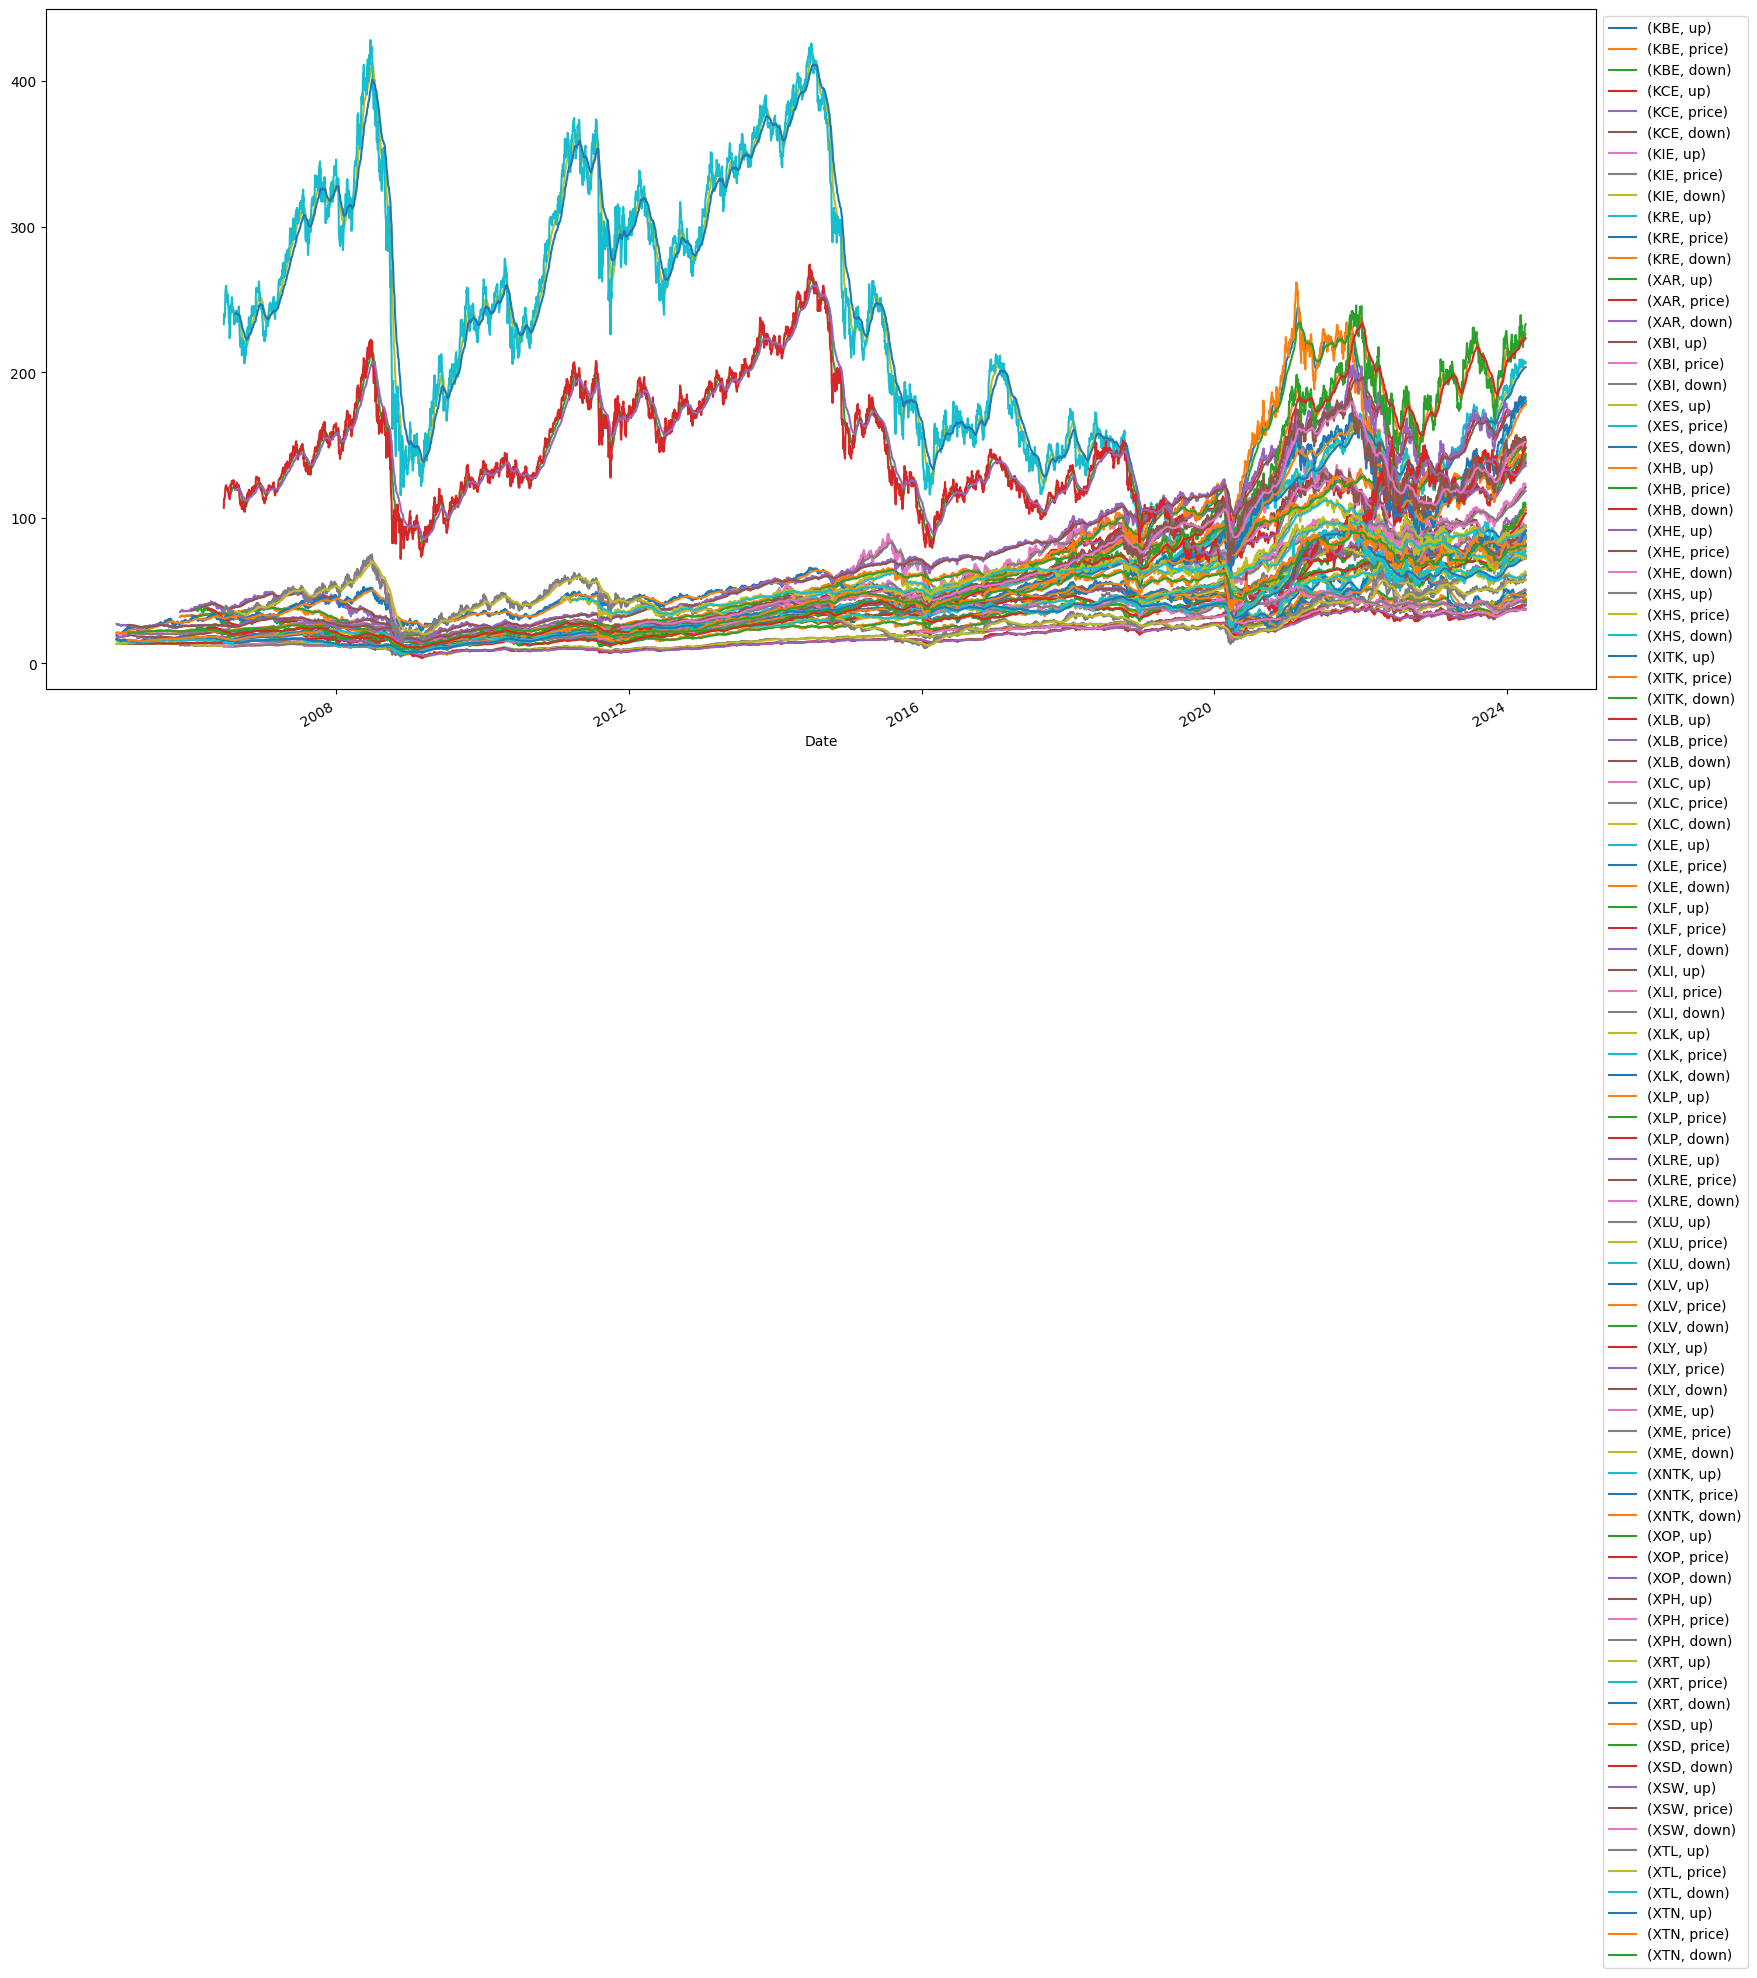

In [373]:
channels.plot(figsize=(20, 10)).legend(bbox_to_anchor=(1.0, 1.0))

In [374]:
(shares.iloc[-1] * prices.iloc[-1]).sum() + cash.iloc[-1] - borrowed.iloc[-1]

np.float64(1508135.5160234373)

In [387]:
tx_costs.sum()

np.float64(8977.471120356939)

<Axes: xlabel='Date'>

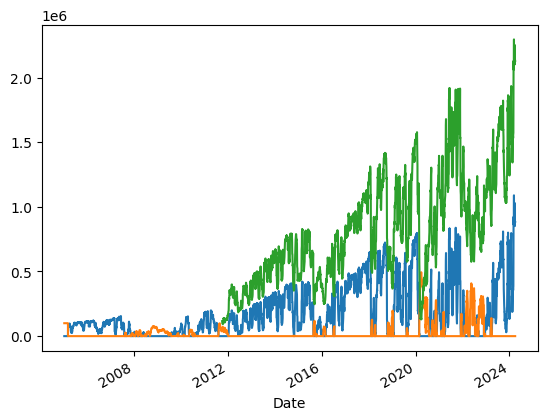

In [319]:
borrowed.plot()
cash.plot()
(shares * prices).dropna().sum(axis=1).plot()

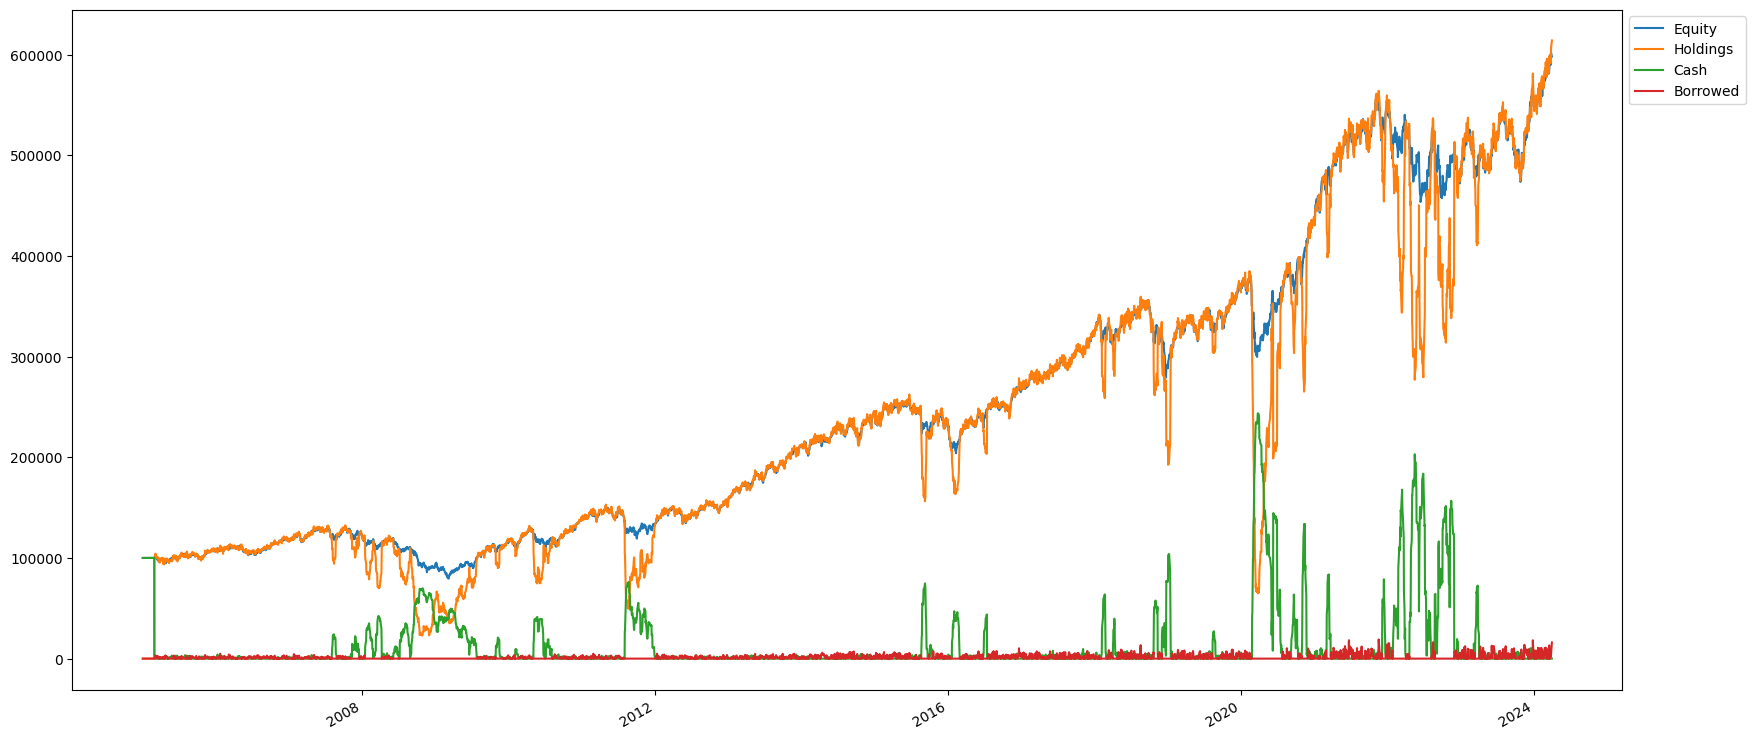

In [389]:
holdings = (shares * prices['2005-01-01':'2024-04-01']).fillna(0).sum(axis=1)
equity = holdings + cash - borrowed
pd.concat([equity, holdings, cash, borrowed], axis=1).rename(columns={0: 'Equity', 1: 'Holdings', 2: 'Cash', 3: 'Borrowed'}).plot(figsize=(20, 10)).legend(bbox_to_anchor=(1.0, 1.0))

In [388]:
equity.iloc[-1]

np.float64(598028.750922115)

In [365]:
yearly = np.array([1.8, 16.1, 1.6, -8.7, 17.2, 19.6, -6.5, 15.0, 35.6, -0.8, -6.5, 8.5, 23.8, -5.7, 10.6, 18.7, 8.9, -11.0, 14.7, 8.4])
# yearly = np.array([18]*20)
start = 100_000
for mod in yearly / 100 + 1:
    start *= mod
start


np.float64(416460.8741536191)

In [386]:
shares.diff().fillna(0).astype(bool).sum().sum()

np.int64(25121)

In [385]:
equity.groupby(pd.Grouper(freq='ME')).nth(-1).pct_change() * 100

2005-01-31         NaN
2005-02-28    0.000000
2005-03-31   -2.038973
2005-04-29   -2.164408
2005-05-31    3.590346
                ...   
2023-12-29    7.070587
2024-01-31   -1.099556
2024-02-29    4.407758
2024-03-28    4.213537
2024-04-01   -0.605715
Length: 232, dtype: float64